In [ ]:
#https://images.unsplash.com/photo-1602418013963-c1f017b3bb63?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8YmVhdXRpZnVsJTIwY2F0fGVufDB8fDB8fA%3D%3D&w=1000&q=80

In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [66]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels.h5

--2022-10-08 05:22:05--  https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102967424 (98M) [application/octet-stream]
Saving to: ‘resnet50_weights_tf_dim_ordering_tf_kernels.h5’

resnet50_weights_tf 100%[===================>]  98.20M   112MB/s    in 0.9s    

2022-10-08 05:22:06 (112 MB/s) - ‘resnet50_weights_tf_dim_ordering_tf_kernels.h5’ saved [102967424/102967424]



In [67]:
model = ResNet50(weights='/content/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
model = ResNet50(weights='imagenet')

In [68]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [34]:
img = image.load_img('elephant.jpeg')

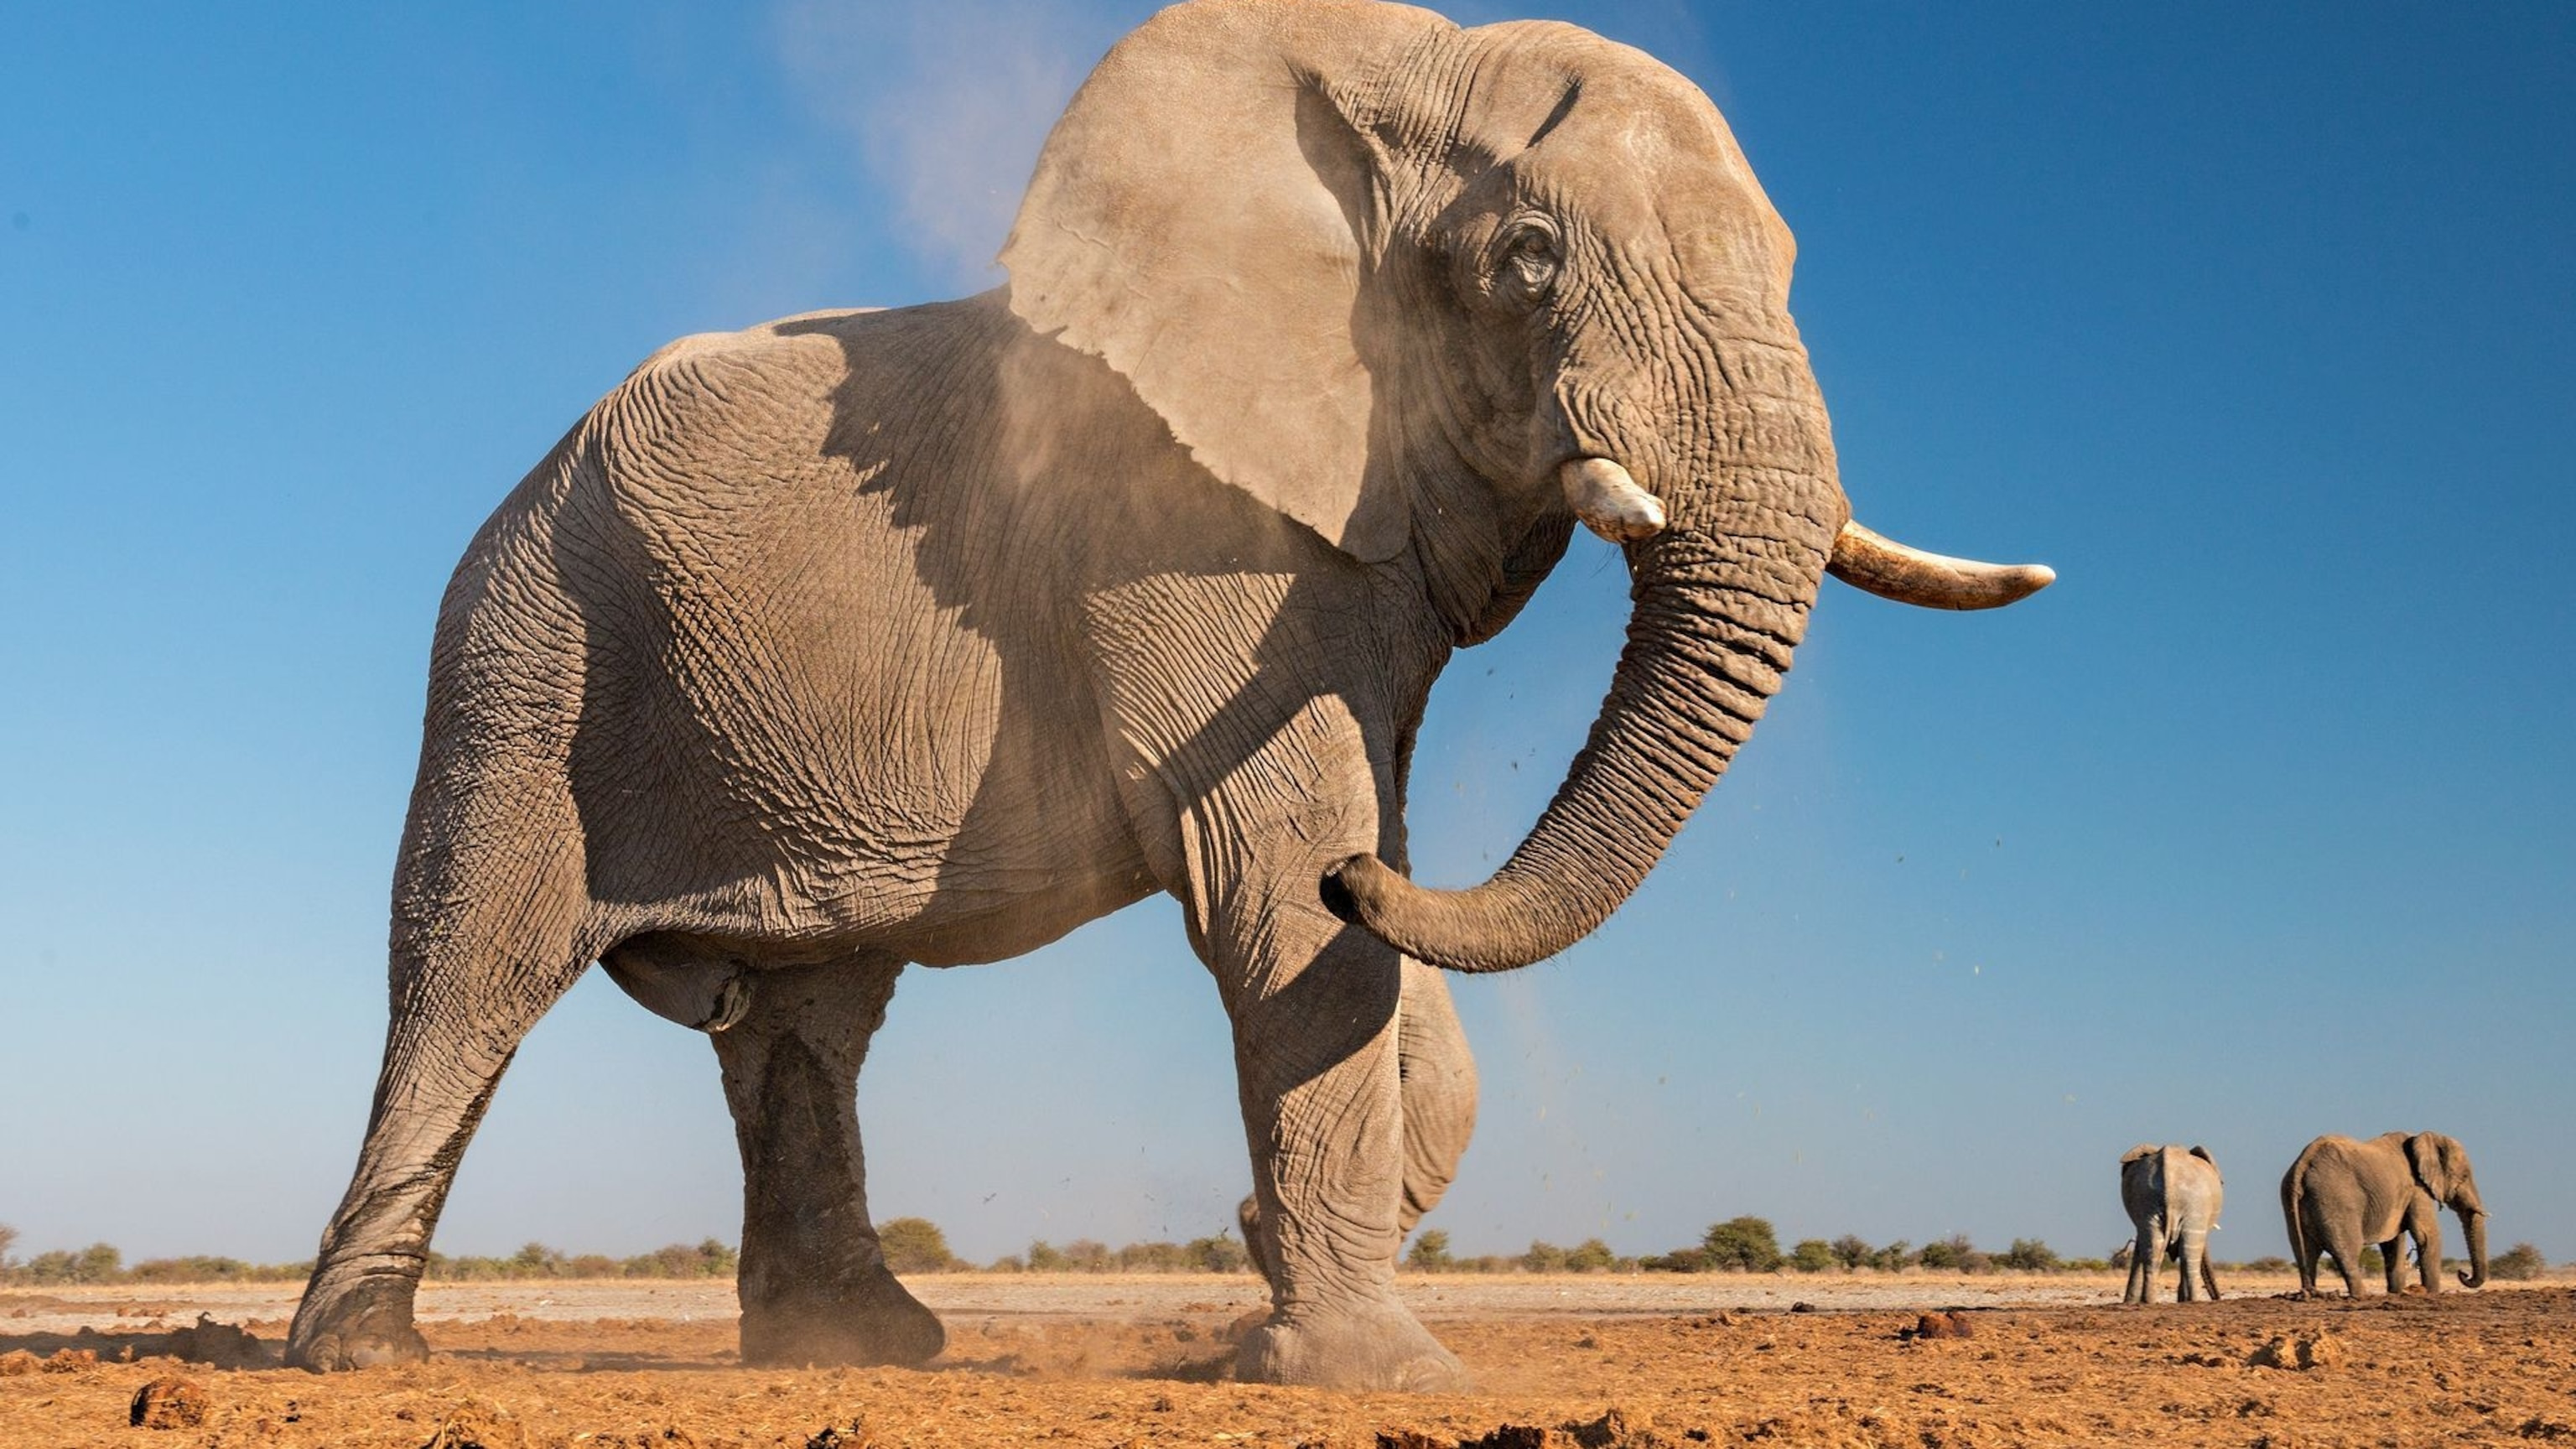

In [37]:
img

In [35]:
image.img_to_array(img).shape

(1728, 3072, 3)

In [38]:
img_pixel = image.img_to_array(img)

In [39]:
model.predict(img_pixel)

ValueError: ignored

In [54]:
img_converted_size = image.load_img('elephant.jpeg', target_size = (224, 224))

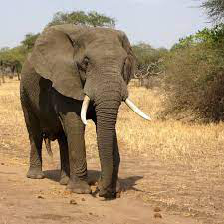

In [55]:
img_converted_size

In [56]:
img_pixel_converted = image.img_to_array(img_converted_size)

In [57]:
img_pixel_converted.shape

(224, 224, 3)

In [58]:
np.expand_dims(img_pixel_converted, axis = 0).shape

(1, 224, 224, 3)

In [59]:
img_pixel_converted = np.expand_dims(img_pixel_converted, axis = 0)

In [60]:
img_pixel_converted.shape

(1, 224, 224, 3)

In [61]:
model.predict(img_pixel_converted).shape

(1, 1000)

In [62]:
model.predict(img_pixel_converted)

array([[7.31467942e-10, 2.56133378e-11, 5.89551602e-11, 2.23516580e-10,
        9.13277370e-11, 2.15257900e-09, 2.20902706e-11, 4.30721517e-12,
        1.59344630e-12, 3.65779664e-11, 1.63040873e-13, 1.70709990e-13,
        7.39842107e-13, 1.43393565e-12, 7.49257373e-13, 2.93708634e-12,
        1.91938175e-12, 3.81005383e-12, 2.26739786e-12, 1.14570202e-12,
        6.47974773e-12, 3.32030063e-11, 1.78774461e-11, 5.31443431e-11,
        2.43428576e-11, 3.13888043e-12, 1.32622418e-12, 1.22608206e-12,
        3.41362192e-13, 6.90843866e-12, 1.03200380e-12, 5.64195392e-13,
        4.01605073e-13, 1.07529385e-09, 2.12394005e-10, 1.98165911e-11,
        3.66747382e-10, 5.38911311e-11, 8.68506309e-12, 1.80115520e-10,
        2.49261115e-12, 2.46272078e-12, 3.67736050e-12, 7.82023266e-11,
        7.39591374e-12, 1.72489258e-12, 4.62778307e-13, 3.79325529e-11,
        6.55763666e-10, 1.44450563e-10, 3.29213962e-10, 1.56801866e-06,
        4.87218512e-12, 3.54376186e-12, 5.82929625e-12, 2.200187

In [63]:
np.argmax(model.predict(img_pixel_converted))

386

In [64]:
decode_predictions(model.predict(img_pixel_converted), top=5)

[[('n02504458', 'African_elephant', 0.8112169),
  ('n01871265', 'tusker', 0.17796192),
  ('n02504013', 'Indian_elephant', 0.010819283),
  ('n01704323', 'triceratops', 1.5680187e-06),
  ('n02454379', 'armadillo', 5.0554025e-08)]]